# Getting Started with Data Science

## Setup:

### Importing the necessary libraries and magic functions

Libraries:
* <a href="http://www.numpy.org/">**Numpy**</a>: Fundamental package for scientific computing
* <a href="https://pandas.pydata.org/">**Pandas**</a>: Library providing high-performance, easy-to-use data structures and data analysis tools
* <a href="https://matplotlib.org/">**Matplotlib**</a>: 2D Plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms
* <a href="https://seaborn.pydata.org/">**Seaborn**</a>: Data visualization library based on matplotlib

Magic Functions:
* %matplotlib inline - magic function in Jupyter Notebook that allows plots to be displayed within the notebook

In [1]:
%matplotlib inline

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

## Pandas Series

A Series is a one-dimensional labeled array capable of holding any data type. The axis labels are collectively referred to as the index.

For this example, we will create a series of 5 samples containing information about height in cm.

In [2]:
s_height = pd.Series([165,154,170,183,120], index=['a','b','c','d','e'])

#### View the series

In [3]:
s_height

a    165
b    154
c    170
d    183
e    120
dtype: int64

#### Check series statistics

In [4]:
s_height.mean()

158.4

In [5]:
s_height.max()

183

In [6]:
s_height.min()

120

In [11]:
s_height.describe()

count      5.000000
mean     158.400000
std       23.860008
min      120.000000
25%      154.000000
50%      165.000000
75%      170.000000
max      183.000000
dtype: float64

### Accessing Series Values

#### By index key:

In [12]:
s_height['b']

154

#### By index position (starting with 0)

In [13]:
s_height.iloc[2]

170

#### Access multiple values by specifying indices

In [14]:
s_height[['a','c','d']]

a    165
c    170
d    183
dtype: int64

#### Access multiple values by specifying index range

In [15]:
s_height['a':'d']

a    165
b    154
c    170
d    183
dtype: int64

### Modifying Values

In [16]:
s_height['a'] = 175

In [17]:
s_height['a']

175

### Filtering Values

#### Check True/False value based on condition

In [18]:
s_height < 170

a    False
b     True
c    False
d    False
e     True
dtype: bool

#### Select samples that satisfy condition

In [19]:
s_height[s_height < 170]

b    154
e    120
dtype: int64

#### Select samples with "AND" condition

In [20]:
s_height[(s_height < 180) & (s_height > 160)]

a    175
c    170
dtype: int64

#### Select samples with "OR" condition

In [21]:
s_height[(s_height > 160) | (s_height.index == 'c' )]

a    175
c    170
d    183
dtype: int64

### Plotting the series

<AxesSubplot:title={'center':'Heights'}>

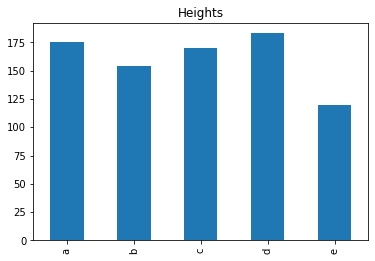

In [22]:
s_height.plot.bar(title="Heights")

## Pandas Dataframe

A Dataframe is the primary pandas data structure. It is a Two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). Arithmetic operations align on both row and column labels. Can be thought of as a dict-like container for Series objects. 

To put it simply, a dataframe is a table with rows (samples) and columns (features)

Pandas loads data as a Dataframe object

### Loading Data

#### Available Readers and Writers for Pandas

<table border="1" class="colwidths-given docutils">
<colgroup>
<col width="12%" />
<col width="40%" />
<col width="24%" />
<col width="24%" />
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Format Type</th>
<th class="head">Data Description</th>
<th class="head">Reader</th>
<th class="head">Writer</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td>text</td>
<td><a class="reference external" href="https://en.wikipedia.org/wiki/Comma-separated_values">CSV</a></td>
<td><a class="reference internal" href="#io-read-csv-table"><span class="std std-ref">read_csv</span></a></td>
<td><a class="reference internal" href="#io-store-in-csv"><span class="std std-ref">to_csv</span></a></td>
</tr>
<tr class="row-odd"><td>text</td>
<td><a class="reference external" href="http://www.json.org/">JSON</a></td>
<td><a class="reference internal" href="#io-json-reader"><span class="std std-ref">read_json</span></a></td>
<td><a class="reference internal" href="#io-json-writer"><span class="std std-ref">to_json</span></a></td>
</tr>
<tr class="row-even"><td>text</td>
<td><a class="reference external" href="https://en.wikipedia.org/wiki/HTML">HTML</a></td>
<td><a class="reference internal" href="#io-read-html"><span class="std std-ref">read_html</span></a></td>
<td><a class="reference internal" href="#io-html"><span class="std std-ref">to_html</span></a></td>
</tr>
<tr class="row-odd"><td>text</td>
<td>Local clipboard</td>
<td><a class="reference internal" href="#io-clipboard"><span class="std std-ref">read_clipboard</span></a></td>
<td><a class="reference internal" href="#io-clipboard"><span class="std std-ref">to_clipboard</span></a></td>
</tr>
<tr class="row-even"><td>binary</td>
<td><a class="reference external" href="https://en.wikipedia.org/wiki/Microsoft_Excel">MS Excel</a></td>
<td><a class="reference internal" href="#io-excel-reader"><span class="std std-ref">read_excel</span></a></td>
<td><a class="reference internal" href="#io-excel-writer"><span class="std std-ref">to_excel</span></a></td>
</tr>
<tr class="row-odd"><td>binary</td>
<td><a class="reference external" href="https://support.hdfgroup.org/HDF5/whatishdf5.html">HDF5 Format</a></td>
<td><a class="reference internal" href="#io-hdf5"><span class="std std-ref">read_hdf</span></a></td>
<td><a class="reference internal" href="#io-hdf5"><span class="std std-ref">to_hdf</span></a></td>
</tr>
<tr class="row-even"><td>binary</td>
<td><a class="reference external" href="https://github.com/wesm/feather">Feather Format</a></td>
<td><a class="reference internal" href="#io-feather"><span class="std std-ref">read_feather</span></a></td>
<td><a class="reference internal" href="#io-feather"><span class="std std-ref">to_feather</span></a></td>
</tr>
<tr class="row-odd"><td>binary</td>
<td><a class="reference external" href="https://parquet.apache.org/">Parquet Format</a></td>
<td><a class="reference internal" href="#io-parquet"><span class="std std-ref">read_parquet</span></a></td>
<td><a class="reference internal" href="#io-parquet"><span class="std std-ref">to_parquet</span></a></td>
</tr>
<tr class="row-even"><td>binary</td>
<td><a class="reference external" href="http://msgpack.org/index.html">Msgpack</a></td>
<td><a class="reference internal" href="#io-msgpack"><span class="std std-ref">read_msgpack</span></a></td>
<td><a class="reference internal" href="#io-msgpack"><span class="std std-ref">to_msgpack</span></a></td>
</tr>
<tr class="row-odd"><td>binary</td>
<td><a class="reference external" href="https://en.wikipedia.org/wiki/Stata">Stata</a></td>
<td><a class="reference internal" href="#io-stata-reader"><span class="std std-ref">read_stata</span></a></td>
<td><a class="reference internal" href="#io-stata-writer"><span class="std std-ref">to_stata</span></a></td>
</tr>
<tr class="row-even"><td>binary</td>
<td><a class="reference external" href="https://en.wikipedia.org/wiki/SAS_(software)">SAS</a></td>
<td><a class="reference internal" href="#io-sas-reader"><span class="std std-ref">read_sas</span></a></td>
<td>&#160;</td>
</tr>
<tr class="row-odd"><td>binary</td>
<td><a class="reference external" href="https://docs.python.org/3/library/pickle.html">Python Pickle Format</a></td>
<td><a class="reference internal" href="#io-pickle"><span class="std std-ref">read_pickle</span></a></td>
<td><a class="reference internal" href="#io-pickle"><span class="std std-ref">to_pickle</span></a></td>
</tr>
<tr class="row-even"><td>SQL</td>
<td><a class="reference external" href="https://en.wikipedia.org/wiki/SQL">SQL</a></td>
<td><a class="reference internal" href="#io-sql"><span class="std std-ref">read_sql</span></a></td>
<td><a class="reference internal" href="#io-sql"><span class="std std-ref">to_sql</span></a></td>
</tr>
<tr class="row-odd"><td>SQL</td>
<td><a class="reference external" href="https://en.wikipedia.org/wiki/BigQuery">Google Big Query</a></td>
<td><a class="reference internal" href="#io-bigquery"><span class="std std-ref">read_gbq</span></a></td>
<td><a class="reference internal" href="#io-bigquery"><span class="std std-ref">to_gbq</span></a></td>
</tr>
</tbody>
</table>

In [60]:
df = pd.read_csv('marvel-wikia-data.csv')

### Inspect Dataset

#### View top rows

In [61]:
df.head()

,page_id,name,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


#### View bottom rows

In [62]:
df.tail()

,page_id,name,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
16371,657508,Ru'ach (Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16372,665474,Thane (Thanos' son) (Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16373,695217,Tinkerer (Skrull) (Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16374,708811,TK421 (Spiderling) (Earth-616),Secret Identity,Neutral Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16375,673702,Yologarch (Earth-616),NaN,Bad Characters,NaN,NaN,NaN,NaN,Living Characters,NaN,NaN,NaN


#### Inspect data types of features

In [63]:
df.dtypes

page_id               int64
name                 object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
Year                float64
dtype: object

#### Describe the dataset

In [64]:
df.describe() #This will only include numeric features

,page_id,APPEARANCES,Year
count,16376.000000,15280.000000,15561.000000
mean,300232.082377,17.033377,1984.951803
std,253460.403399,96.372959,19.663571
min,1025.000000,1.000000,1939.000000
25%,28309.500000,1.000000,1974.000000
50%,282578.000000,3.000000,1990.000000
75%,509077.000000,8.000000,2000.000000
max,755278.000000,4043.000000,2013.000000


In [65]:
df.describe(include='object') #This will only include object/string features

,name,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,FIRST APPEARANCE
count,16376,12606,13564,6609,12112,15522,90,16373,15561
unique,16375,4,3,24,25,4,6,2,832
top,Spinner (Earth-616),Secret Identity,Bad Characters,Blue Eyes,Black Hair,Male Characters,Homosexual Characters,Living Characters,Jun-92
freq,2,6275,6720,1962,3755,11638,66,12608,72


In [66]:
df.describe(include='all') #This will include all features

,page_id,name,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
count,16376.000000,16376,12606,13564,6609,12112,15522,90,16373,15280.000000,15561,15561.000000
unique,NaN,16375,4,3,24,25,4,6,2,NaN,832,NaN
top,NaN,Spinner (Earth-616),Secret Identity,Bad Characters,Blue Eyes,Black Hair,Male Characters,Homosexual Characters,Living Characters,NaN,Jun-92,NaN
freq,NaN,2,6275,6720,1962,3755,11638,66,12608,NaN,72,NaN
mean,300232.082377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.033377,NaN,1984.951803
std,253460.403399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.372959,NaN,19.663571
min,1025.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1939.000000
25%,28309.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1974.000000
50%,282578.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,1990.000000
75%,509077.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,2000.000000


#### Show column summary

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           16376 non-null  int64  
 1   name              16376 non-null  object 
 2   ID                12606 non-null  object 
 3   ALIGN             13564 non-null  object 
 4   EYE               6609 non-null   object 
 5   HAIR              12112 non-null  object 
 6   SEX               15522 non-null  object 
 7   GSM               90 non-null     object 
 8   ALIVE             16373 non-null  object 
 9   APPEARANCES       15280 non-null  float64
 10  FIRST APPEARANCE  15561 non-null  object 
 11  Year              15561 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 1.5+ MB


#### Show dataset size

In [68]:
df.shape

(16376, 12)

### Inspect Columns

#### Set index

In [69]:
df.set_index('ID', inplace=True)

In [70]:
df.head()

,page_id,name,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
ID,,,,,,,,,,,
Secret Identity,1678,Spider-Man (Peter Parker),Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
Public Identity,7139,Captain America (Steven Rogers),Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
Public Identity,64786,"Wolverine (James \""Logan\"" Howlett)",Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
Public Identity,1868,"Iron Man (Anthony \""Tony\"" Stark)",Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
No Dual Identity,2460,Thor (Thor Odinson),Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


#### Show counts of categorical columns

In [71]:
df['HAIR'].value_counts()

Black Hair               3755
Brown Hair               2339
Blond Hair               1582
No Hair                  1176
Bald                      838
White Hair                754
Red Hair                  620
Grey Hair                 531
Green Hair                117
Auburn Hair                78
Blue Hair                  56
Strawberry Blond Hair      47
Purple Hair                47
Orange Hair                43
Variable Hair              32
Pink Hair                  31
Yellow Hair                20
Silver Hair                16
Gold Hair                   8
Reddish Blond Hair          6
Light Brown Hair            6
Magenta Hair                5
Orange-brown Hair           3
Bronze Hair                 1
Dyed Hair                   1
Name: HAIR, dtype: int64

In [72]:
df.ALIVE.value_counts()

Living Characters      12608
Deceased Characters     3765
Name: ALIVE, dtype: int64

#### Show unique values per category

In [73]:
df.GSM.unique()

array([nan, 'Bisexual Characters', 'Transvestites',
       'Homosexual Characters', 'Pansexual Characters',
       'Transgender Characters', 'Genderfluid Characters'], dtype=object)

#### Show column stats

In [74]:
df.APPEARANCES.max()

4043.0

In [75]:
df.APPEARANCES.mean()

17.033376963350786

## Selection & Slicing

#### Slice by Column Name

In [76]:
df[['name','SEX','Year']].head()

,name,SEX,Year
ID,,,
Secret Identity,Spider-Man (Peter Parker),Male Characters,1962.0
Public Identity,Captain America (Steven Rogers),Male Characters,1941.0
Public Identity,"Wolverine (James \""Logan\"" Howlett)",Male Characters,1974.0
Public Identity,"Iron Man (Anthony \""Tony\"" Stark)",Male Characters,1963.0
No Dual Identity,Thor (Thor Odinson),Male Characters,1950.0


#### Slice by index

In [78]:
df.iloc[1678:1868]

,page_id,name,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
ID,,,,,,,,,,,
Secret Identity,26582,Samuel Caulkin (Earth-616),Good Characters,NaN,Brown Hair,Male Characters,NaN,Living Characters,22.0,Mar-93,1993.0
Secret Identity,4367,Dominic Destine (Earth-616),Good Characters,NaN,Red Hair,Male Characters,NaN,Living Characters,22.0,Jul-94,1994.0
Secret Identity,4017,Jasmine Destine (Earth-616),Good Characters,Brown Eyes,Black Hair,Female Characters,NaN,Living Characters,22.0,Jul-94,1994.0
Secret Identity,120090,Paradox (Strange) (Earth-616),Good Characters,White Eyes,No Hair,Male Characters,NaN,Living Characters,22.0,Jan-94,1994.0
Secret Identity,25097,Gregory Herd (Earth-616),Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,22.0,Nov-95,1995.0
...,...,...,...,...,...,...,...,...,...,...,...
Secret Identity,1086,Darren Bentley (Earth-616),Bad Characters,NaN,NaN,Male Characters,NaN,Deceased Characters,19.0,Jan-70,1970.0
No Dual Identity,626764,Jenna (Earth-616),Neutral Characters,Blue Eyes,Blond Hair,Female Characters,NaN,Living Characters,19.0,Jun-71,1971.0
No Dual Identity,17090,Kulan Gath (Earth-616),Bad Characters,NaN,NaN,Male Characters,NaN,Living Characters,19.0,Mar-72,1972.0


#### Slice by index & column

In [90]:
df.iloc[1678:1868],['name','SEX','Year']

(                  page_id                           name               ALIGN  \
 ID                                                                             
 Secret Identity     26582     Samuel Caulkin (Earth-616)     Good Characters   
 Secret Identity      4367    Dominic Destine (Earth-616)     Good Characters   
 Secret Identity      4017    Jasmine Destine (Earth-616)     Good Characters   
 Secret Identity    120090  Paradox (Strange) (Earth-616)     Good Characters   
 Secret Identity     25097       Gregory Herd (Earth-616)  Neutral Characters   
 ...                   ...                            ...                 ...   
 Secret Identity      1086     Darren Bentley (Earth-616)      Bad Characters   
 No Dual Identity   626764              Jenna (Earth-616)  Neutral Characters   
 No Dual Identity    17090         Kulan Gath (Earth-616)      Bad Characters   
 Public Identity     15914     Patricia Starr (Earth-616)     Good Characters   
 Secret Identity     43337  

#### Slice by row number

In [91]:
df.iloc[1:6]

,page_id,name,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
ID,,,,,,,,,,,
Public Identity,7139,Captain America (Steven Rogers),Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
Public Identity,64786,"Wolverine (James \""Logan\"" Howlett)",Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
Public Identity,1868,"Iron Man (Anthony \""Tony\"" Stark)",Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
No Dual Identity,2460,Thor (Thor Odinson),Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0
Public Identity,2458,Benjamin Grimm (Earth-616),Good Characters,Blue Eyes,No Hair,Male Characters,NaN,Living Characters,2255.0,Nov-61,1961.0


#### Slice by row number & column number

In [92]:
df.iloc[1:6,[0,5,10]]

,page_id,SEX,Year
ID,,,
Public Identity,7139,Male Characters,1941.0
Public Identity,64786,Male Characters,1974.0
Public Identity,1868,Male Characters,1963.0
No Dual Identity,2460,Male Characters,1950.0
Public Identity,2458,Male Characters,1961.0


### Filtering & Conditional Selection

#### Filtering based on condition

In [93]:
df.loc[df['APPEARANCES']>3000]

,page_id,name,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
ID,,,,,,,,,,,
Secret Identity,1678,Spider-Man (Peter Parker),Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
Public Identity,7139,Captain America (Steven Rogers),Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
Public Identity,64786,"Wolverine (James \""Logan\"" Howlett)",Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0


#### Filtering based on multiple conditions

In [94]:
df.loc[(df['GSM']=='Genderfluid Characters') | (df['GSM']=='Bisexual Characters')]

,page_id,name,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
ID,,,,,,,,,,,
Public Identity,6545,Natalia Romanova (Earth-616),Good Characters,Green Eyes,Red Hair,Female Characters,Bisexual Characters,Living Characters,1050.0,Apr-64,1964.0
No Dual Identity,1818,Hercules (Earth-616),Good Characters,Blue Eyes,Brown Hair,Male Characters,Bisexual Characters,Living Characters,725.0,Oct-65,1965.0
Secret Identity,2307,Elizabeth Braddock (Earth-616),Neutral Characters,Blue Eyes,Purple Hair,Female Characters,Bisexual Characters,Living Characters,708.0,Dec-76,1976.0
No Dual Identity,2042,Loki Laufeyson (Earth-616),Neutral Characters,Green Eyes,Black Hair,Genderfluid Characters,Bisexual Characters,Living Characters,532.0,Aug-49,1949.0
Secret Identity,55878,Raven Darkholme (Earth-616),Bad Characters,Yellow Eyes,Red Hair,Female Characters,Bisexual Characters,Living Characters,371.0,Apr-78,1978.0
Secret Identity,2182,Heather Douglas (Earth-616),Good Characters,Blue Eyes,Bald,Female Characters,Bisexual Characters,Living Characters,323.0,Jan-73,1973.0
Secret Identity,51769,Akihiro (Earth-616),Bad Characters,Blue Eyes,Black Hair,Male Characters,Bisexual Characters,Living Characters,189.0,Oct-06,2006.0
Public Identity,18271,Marlo Chandler (Earth-616),Good Characters,Blue Eyes,Red Hair,Female Characters,Bisexual Characters,Living Characters,131.0,Sep-88,1988.0
No Dual Identity,1465,Doop (Earth-616),Good Characters,Variable Eyes,Black Hair,Male Characters,Bisexual Characters,Living Characters,113.0,Jul-01,2001.0


#### Filtering based on string search

In [95]:
df.loc[(df['name'].str.contains('Sugar'))]

,page_id,name,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
ID,,,,,,,,,,,
Public Identity,34301,Sugar Kane (Earth-616),Good Characters,NaN,Blond Hair,Female Characters,Bisexual Characters,Living Characters,6.0,Aug-01,2001.0
Secret Identity,397442,Sheba Sugarfangs (Earth-616),Neutral Characters,Red Eyes,Brown Hair,Female Characters,NaN,Living Characters,1.0,Nov-10,2010.0


#### Filtering based on exact string match

In [96]:
df.loc[df['name']=='Captain America (Steven Rogers)']

,page_id,name,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
ID,,,,,,,,,,,
Public Identity,7139,Captain America (Steven Rogers),Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0


#### Show column value for exact string match

In [97]:
df.loc[df['name']=='Captain America (Steven Rogers)','SEX']

ID
Public Identity    Male Characters
Name: SEX, dtype: object

#### Show selected columns for exact string match

In [98]:
df.loc[df['name']=='Captain America (Steven Rogers)',['name','SEX','Year']]

,name,SEX,Year
ID,,,
Public Identity,Captain America (Steven Rogers),Male Characters,1941.0


### Removing Elements

#### Dropping row by index

In [108]:
df.drop([1678, inplace=True])

SyntaxError: invalid syntax (3428400742.py, line 1)

In [109]:
df.shape

(16376, 11)

#### Dropping column by name

In [110]:
df2 = df.drop('GSM', axis=1)

In [111]:
df.shape

(16376, 11)

In [112]:
df2.shape

(16376, 10)

### Group By Function

#### Group By one feature and aggregate

In [113]:
df.groupby('ID')[['name','SEX']].count()

,name,SEX
ID,,
Known to Authorities Identity,15,15
No Dual Identity,1788,1744
Public Identity,4528,4423
Secret Identity,6275,6026


In [114]:
df.groupby('ID')[['APPEARANCES']].mean()

,APPEARANCES
ID,
Known to Authorities Identity,74.400000
No Dual Identity,24.402013
Public Identity,23.407615
Secret Identity,17.379794


In [115]:
df.groupby('ID')[['APPEARANCES']].describe()

APPEARANCES                                   \
                                    count       mean         std  min  25%   
ID                                                                           
Known to Authorities Identity        15.0  74.400000  112.960676  2.0  9.0   
No Dual Identity                   1689.0  24.402013  107.182232  1.0  1.0   
Public Identity                    4281.0  23.407615  141.738933  1.0  1.0   
Secret Identity                    5919.0  17.379794   77.300955  1.0  1.0   

                                                   
                                50%   75%     max  
ID                                                 
Known to Authorities Identity  26.0  75.5   348.0  
No Dual Identity                3.0  10.0  2258.0  
Public Identity                 3.0   8.0  3360.0  
Secret Identity                 4.0  10.0  4043.0

#### Group by multiple features

In [116]:
df.groupby(['ID','ALIGN'])[['APPEARANCES']].sum()

APPEARANCES
ID                            ALIGN                          
Known to Authorities Identity Bad Characters             35.0
                              Good Characters           720.0
                              Neutral Characters        361.0
No Dual Identity              Bad Characters           4758.0
                              Good Characters         25296.0
                              Neutral Characters       9137.0
Public Identity               Bad Characters          15153.0
                              Good Characters         64698.0
                              Neutral Characters      14807.0
Secret Identity               Bad Characters          27130.0
                              Good Characters         56278.0
                              Neutral Characters      15316.0

#### Number of observations in each group

In [117]:
df.groupby(['ID','ALIGN']).size()

ID                             ALIGN             
Known to Authorities Identity  Bad Characters           3
                               Good Characters         10
                               Neutral Characters       2
No Dual Identity               Bad Characters         474
                               Good Characters        647
                               Neutral Characters     390
Public Identity                Bad Characters        1452
                               Good Characters       1628
                               Neutral Characters     706
Secret Identity                Bad Characters        3223
                               Good Characters       1613
                               Neutral Characters     818
dtype: int64

### Pivot Tables

#### Single Index

In [118]:
pd.pivot_table(df, index = ['ID'])

,APPEARANCES,Year,page_id
ID,,,
Known to Authorities Identity,74.400000,1992.866667,52370.200000
No Dual Identity,24.402013,1981.134543,402764.313199
Public Identity,23.407615,1981.168421,356246.426237
Secret Identity,17.379794,1987.392068,244121.057530


In [119]:
pd.pivot_table(df, index = ['ID'], values = 'APPEARANCES', aggfunc='sum')

,APPEARANCES
ID,
Known to Authorities Identity,1116.0
No Dual Identity,41215.0
Public Identity,100208.0
Secret Identity,102871.0


#### Multi Index

In [120]:
pd.pivot_table(df, index=['ID','SEX'], values = ['name'], aggfunc='count')

name
ID                            SEX                         
Known to Authorities Identity Agender Characters         1
                              Female Characters          5
                              Male Characters            9
No Dual Identity              Agender Characters        11
                              Female Characters        486
                              Genderfluid Characters     1
                              Male Characters         1246
Public Identity               Agender Characters         5
                              Female Characters       1051
                              Male Characters         3367
Secret Identity               Agender Characters        14
                              Female Characters       1505
                              Genderfluid Characters     1
                              Male Characters         4506

#### Multiple functions

In [121]:
pd.pivot_table(df, index = ['ID','SEX'], values = 'APPEARANCES', aggfunc=[np.sum,np.mean,np.min, np.max])

sum        mean  \
                                                     APPEARANCES APPEARANCES   
ID                            SEX                                              
Known to Authorities Identity Agender Characters           348.0  348.000000   
                              Female Characters            393.0   78.600000   
                              Male Characters              375.0   41.666667   
No Dual Identity              Agender Characters            77.0    7.000000   
                              Female Characters          13414.0   28.785408   
                              Genderfluid Characters       532.0  532.000000   
                              Male Characters            27022.0   23.115483   
Public Identity               Agender Characters            99.0   19.800000   
                              Female Characters          25667.0   25.900101   
                              Male Characters            73966.0   23.208660   
Secret Identity               Agender Characters            97.0    8.818182   
                              Female Characters          30104.0   21.110799   
                              Genderfluid Characters        33.0   33.000000   
                              Male Characters            71277.0   16.755289   

                                                            amin        amax  
                                                     APPEARANCES APPEARANCES  
ID                            SEX                                             
Known to Authorities Identity Agender Characters           348.0       348.0  
                              Female Characters              4.0       319.0  
                              Male Characters                2.0       146.0  
No Dual Identity              Agender Characters             1.0        28.0  
                              Female Characters              1.0      1304.0  
                              Genderfluid Characters       532.0       532.0  
                              Male Characters                1.0      2258.0  
Public Identity               Agender Characters             4.0        61.0  
                              Female Characters              1.0      1713.0  
                              Male Characters                1.0      3360.0  
Secret Identity               Agender Characters             1.0        54.0  
                              Female Characters              1.0       886.0  
                              Genderfluid Characters        33.0        33.0  
                              Male Characters                1.0      4043.0